In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sex', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='bmi', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='children', y='smoker', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['children'].plot(kind='line', figsize=(8, 4), title='children')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [7]:
numerical_col = df.select_dtypes(include='number').columns
numerical_col

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [9]:
categorical_col = df.select_dtypes(include='object').columns
categorical_col

Index(['sex', 'smoker', 'region'], dtype='object')

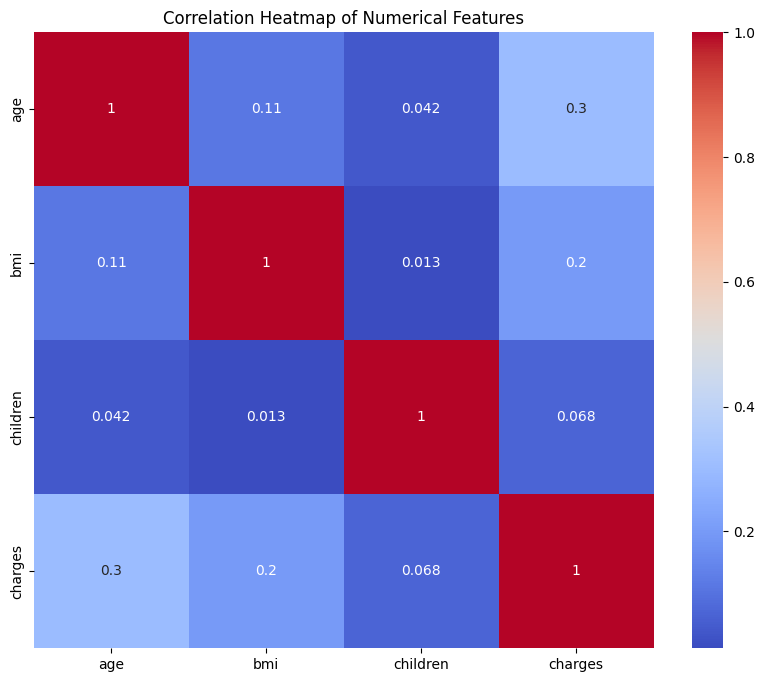

In [12]:
# prompt: heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'numerical_col' and 'df' are defined from previous code

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_col].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

le.fit_transform(df['sex'])

array([0, 1, 1, ..., 0, 0, 0])

In [15]:
df['sex'] = le.fit_transform(df['sex'])

In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [17]:
df['smoker'] = le.fit_transform(df['smoker'])

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [24]:
# prompt: do encode region and store in df

# Assuming 'df' and 'le' are defined from previous code

df['region'] = le.fit_transform(df['region'])
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [25]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [26]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

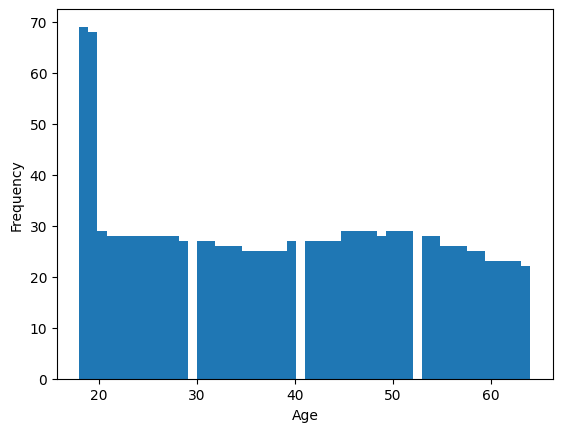

In [29]:
plt.hist(df['age'] , bins=50)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [32]:
X = df.drop('charges' , axis=1)
y = df['charges']

In [34]:
X_train , X_test , y_train , y_test = (train_test_split(X,y,test_size=0.2, random_state=42))

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train , y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(X_test)

In [38]:
# prompt: find r2 score , mse , mae and accuracy

from sklearn.metrics import mean_absolute_error

# Assuming y_test and y_pred are defined from previous code

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Accuracy is not typically used for regression problems.  R-squared is a better metric.
# If you *really* need an accuracy score (perhaps a classification based on charge thresholds),
# you would define a threshold for "correct" prediction.


R-squared: 0.7833463107364539
Mean Squared Error: 33635210.431178406
Mean Absolute Error: 4186.508898366433


In [52]:
# prompt: regenrate full code but this time add standard scaler to it and again find these metrices

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('/content/insurance.csv')

# ... (rest of your existing code up to the feature encoding) ...

# Create a ColumnTransformer to apply OneHotEncoding to categorical features
categorical_features = ['sex', 'smoker', 'region'] # List of categorical columns
numerical_features = ['age', 'bmi', 'children']  # List of numerical columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features), # Apply OneHotEncoder to categorical features
    ])

# Create a pipeline with the preprocessor and the LinearRegression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data and make predictions on the test data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.7835929767120722
Mean Squared Error: 33596915.851361476
Mean Absolute Error: 4181.194473753652


In [53]:
from sklearn.ensemble import RandomForestRegressor
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [56]:
# prompt: regenrate code with comparing with other models of ml

# ... (Your existing code up to the model training section) ...

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Define the models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR()
}

results = {}

for name, model_instance in models.items():
    # Create a pipeline with the preprocessor and the current model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model_instance)
    ])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {
        "R-squared": r2,
        "MSE": mse,
        "MAE": mae
    }

# Print the results for each model
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  R-squared: {metrics['R-squared']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  MAE: {metrics['MAE']}")

# Determine the best model based on a chosen metric (e.g., R-squared)
best_model = max(results, key=lambda k: results[k]['R-squared'])
print(f"\nBest model based on R-squared: {best_model}")


Model: Linear Regression
  R-squared: 0.7835929767120722
  MSE: 33596915.851361476
  MAE: 4181.194473753652
Model: Random Forest
  R-squared: 0.8647097634425496
  MSE: 21003637.60876614
  MAE: 2541.614593844528
Model: Gradient Boosting
  R-squared: 0.8793364486536337
  MSE: 18732863.283815846
  MAE: 2404.90176028892
Model: Support Vector Regression
  R-squared: -0.0705677341215194
  MSE: 166204282.6983881
  MAE: 8605.845654288496

Best model based on R-squared: Gradient Boosting


In [57]:
# prompt: do commit gradient boosting and regenrate code with pickle file

import pickle
# Assuming 'preprocessor' and 'GradientBoostingRegressor' are defined from previous code
# and 'X_train', 'y_train' are your training data.

best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

best_model.fit(X_train, y_train)

# Save the trained model to a file
filename = 'finalized_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

# Load the model from the file (for later use)
loaded_model = pickle.load(open(filename, 'rb'))

# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
r2_loaded = r2_score(y_test, y_pred_loaded)
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
mae_loaded = mean_absolute_error(y_test, y_pred_loaded)

print(f"Loaded Model R-squared: {r2_loaded}")
print(f"Loaded Model Mean Squared Error: {mse_loaded}")
print(f"Loaded Model Mean Absolute Error: {mae_loaded}")


Loaded Model R-squared: 0.8793364486536337
Loaded Model Mean Squared Error: 18732863.283815846
Loaded Model Mean Absolute Error: 2404.90176028892
